In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\class\projects\sem 5\Machine Learning\Custom_CNN_Features.csv")
data=df.drop(['Filename'], axis=1)
data

,Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,414.879486,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,1736.242432,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,435.235992,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,588.439148,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,1080.826782,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,2,283.005707,0.0,0.0,0.0,0.0,0.0,73.068192,0,3528.416992,...,2643.636230,0.0,2036.106934,2269.582275,1973.414917,0.0,0.0,0.0,0.0,657.907715
3249,2,609.193603,0.0,0.0,0.0,0.0,0.0,131.018112,0,8026.524414,...,5950.206055,0.0,4727.840820,5170.731934,4594.757324,0.0,0.0,0.0,0.0,1362.733398
3250,2,781.789490,0.0,0.0,0.0,0.0,0.0,174.997360,0,10129.193360,...,7535.423828,0.0,5972.883789,6563.629883,5749.376465,0.0,0.0,0.0,0.0,1758.735840
3251,2,688.966675,0.0,0.0,0.0,0.0,0.0,206.603851,0,9555.453125,...,7119.000977,0.0,5575.274414,6160.208984,5423.260742,0.0,0.0,0.0,0.0,1670.340088


In [58]:
import numpy as np
a = data[data['Label'] == 0]
b= data[data['Label'] == 1]
print(f'spread A: {a}')
print(f'spread B: {b}')
intraa = np.var(a[['f2', 'f3']], ddof=1)
intrab = np.var(b[['f4', 'f5']], ddof=1)
meanb= np.mean(b[['f4', 'f5']], axis=0)
meana= np.mean(a[['f2', 'f3']], axis=0)
distance = np.linalg.norm(meana - meanb)
print(f'distance between A and B: {distance}')

spread A:       Label         f0          f1          f2          f3          f4  \
315       0  54.072708  190.424149  171.412384  200.844040   59.449810   
316       0  17.999994  427.368317  497.897644  593.005005  179.952545   
317       0  19.093283  302.189911  350.839813  416.387360  126.623985   
318       0   0.000000  304.075775  376.169708  455.118042  139.511551   
319       0  13.408073  308.610718  347.494385  427.345215  125.259972   
...     ...        ...         ...         ...         ...         ...   
2837      0   0.000000   91.127724  133.311844  178.245224   16.989559   
2839      0   0.000000  105.179398  158.497864  211.168915   19.109421   
2842      0   0.000000   88.941750  131.907898  177.548203   16.531143   
2845      0   0.000000  103.924370  166.680130  222.978546   16.164415   
2846      0   0.000000  109.293503  165.631149  222.781113   22.865599   

              f5   f6  f7         f8  ...      f190  f191       f192  \
315   209.542541  0.0   0  56

In [59]:
grouped = data.groupby('Label')

# Calculate the class centroids (mean) for each class
centroids = {}
for label, group_data in grouped:
    class_mean = group_data[['f2', 'f3']].mean(axis=0)
    centroids[label] = class_mean
# Print the class centroids
for label, centroid in centroids.items():
    print(f'Label {label} Centroid: {centroid.values}')
print(grouped)

Label 0 Centroid: [213.78760108 280.33126808]
Label 1 Centroid: [ 85.87393279 156.91125406]
Label 2 Centroid: [2.03302496 6.32234074]


In [61]:
grouped = data.groupby('Label')

# Calculate the standard deviation for each class
standarddeviations = {}
for clabel, group_data in grouped:
    class_std = group_data[['f2', 'f3']].std(axis=0)
    standarddeviations[clabel] = class_std

# Print the standard deviations for each class
for clabel, std_deviation in standarddeviations.items():
    print(f'SD for Label {clabel}: {std_deviation.values}')


SD for Label 0: [86.58855726 99.22540691]
SD for Label 1: [46.00990242 83.53161141]
SD for Label 2: [13.25556061 27.17014755]


In [70]:
grouped = data.groupby('Label')

# Calculate the mean vectors (centroids) for each class
centroids = {}
for clabel, group_data in grouped:
    mean = group_data[['f2', 'f3']].mean(axis=0)
    centroids[clabel] = mean

# Calculate the distance between mean vectors of different classes
clabels = list(centroids.keys())
num_classes = len(clabels)
distances = {}

for i in range(num_classes):
    for j in range(i + 1, num_classes):
        label1 = clabels[i]
        class_label2 = clabels[j]
        distance = np.linalg.norm(centroids[label1] - centroids[class_label2])
        distances[(label1, class_label2)] = distance

# Print the distances between mean vectors
for (label1, class_label2), distance in distances.items():
    print(f'Distance between Label {label1} and Label {class_label2}: {distance}')


Distance between Label 0 and Label 1: 177.74815440349153
Distance between Label 0 and Label 2: 346.29596123353537
Distance between Label 1 and Label 2: 172.35521065783024


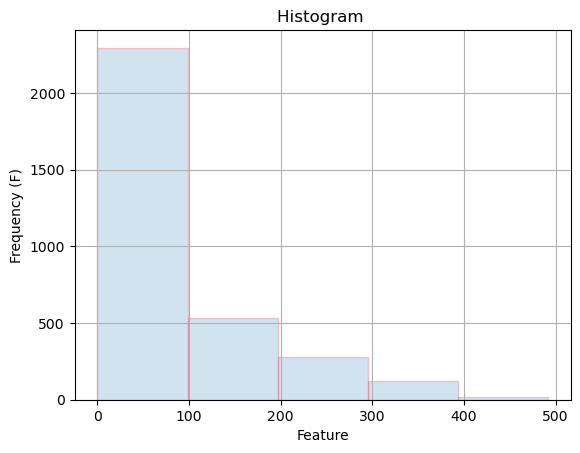

Mean : 64.21304276839226
Variance : 9972.03239400886


In [83]:
import numpy as np
import matplotlib.pyplot as plt


featuredata = df['f16']

# Define the number of bins (buckets) for the histogram
num_bins = 5

# Calculate the histogram data (hist_counts) and bin edges (bin_edges)
hist_counts, bin_edges = np.histogram(featuredata, bins=num_bins)

# Calculate the mean and variance of 'Feature1'
mean_feature1 = np.mean(featuredata)
variance_feature1 = np.var(featuredata, ddof=1)  # Use ddof=1 for sample variance

# Plot the histogram
plt.hist(featuredata, bins=num_bins, edgecolor='red', alpha=0.2)
plt.ylabel('Frequency (F)')
plt.title('Histogram ')
plt.xlabel('Feature')
plt.grid(True)

# Show the histogram and statistics
plt.show()

# Print the mean and variance of 'Feature1'
print(f'Mean : {mean_feature1}')
print(f'Variance : {variance_feature1}')


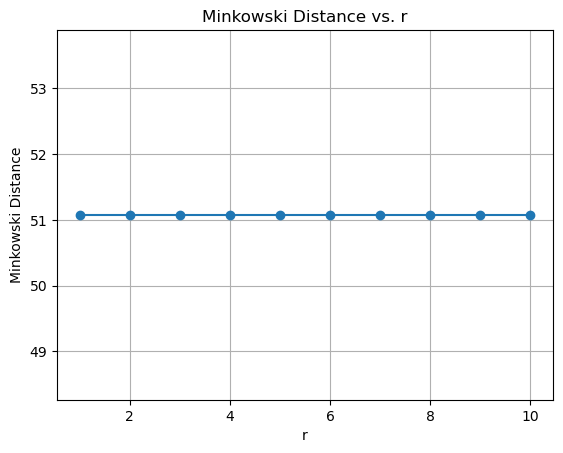

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance


vector1 = np.array([df['f10'][0], df['f15'][0]])
vector2 = np.array([df['f10'][3], df['f15'][3]])

# Define a range of values for 'r'
r_values = range(1, 11)

# Calculate Minkowski distances for different 'r' values
distances = [distance.minkowski(vector1, vector2, p=r) for r in r_values]

# Create a plot to observe the nature of the graph
plt.plot(r_values, distances, marker='o', linestyle='-')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.grid(True)
plt.show()


In [84]:
import numpy as np
from sklearn.model_selection import train_test_split

classes = [0, 1]
sdata = df[df['Label'].isin(classes)]

# Define your features (X) and target (y)
X = sdata[['f2', 'f3']]
y = sdata['Label']

# Split the dataset into a train set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, you have your train and test sets for binary classification
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1882, 2)
X_test shape: (807, 2)
y_train shape: (1882,)
y_test shape: (807,)


In [40]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have already split your data into X_train and y_train
# If not, please refer to the previous code for splitting the data.

# Create a k-NN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to your training data
neigh.fit(X_train, y_train)
accuracy = neigh.score(X_test, y_test)

# Print the accuracy report
print("Accuracy:", accuracy)

Accuracy: 0.919454770755886


In [41]:

test_vect = [[0.009625,0.003646 ]]  # Replace with the feature values you want to classify

# Use the predict() function to classify the test vector
predicted_class = neigh.predict(test_vect)

# Print the predicted class
print("Predicted Class:", predicted_class[0])


Predicted Class: 1


c:\Software\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


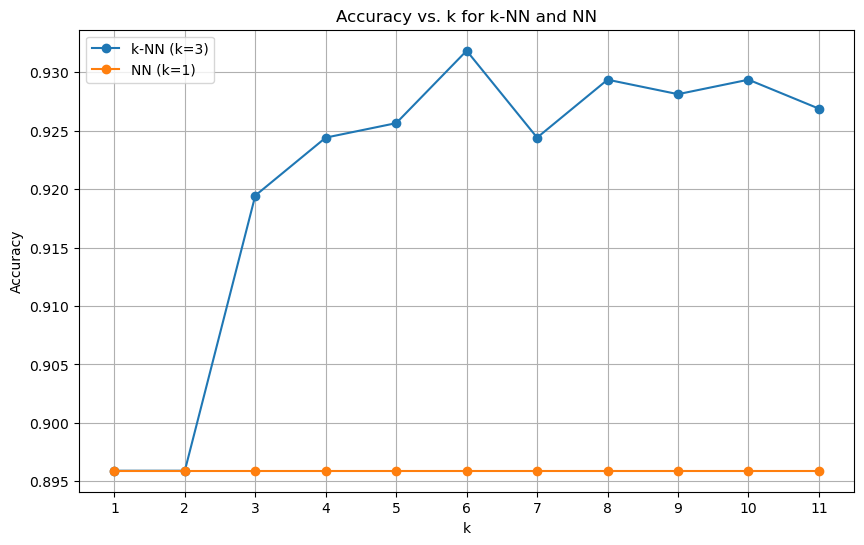

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define your feature vectors (X_train, X_test) and class labels (y_train, y_test)
# Assuming you have already split your data into training and test sets
# If not, please refer to the previous code for splitting the data.

# Create arrays to store accuracy values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = range(1, 12)
knn_accuracies = []
nn_accuracies = []

# Iterate through different values of k
for k in k_values:
    # Train k-NN classifier with k=3
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Predict using k-NN
    knn_predictions = knn_classifier.predict(X_test)

    # Calculate accuracy for k-NN
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_accuracies.append(knn_accuracy)

    # Train NN classifier with k=1
    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(X_train, y_train)

    # Predict using NN
    nn_predictions = nn_classifier.predict(X_test)

    # Calculate accuracy for NN
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    nn_accuracies.append(nn_accuracy)

# Plot the accuracy results
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, label='k-NN (k=3)', marker='o')
plt.plot(k_values, nn_accuracies, label='NN (k=1)', marker='o')
plt.title('Accuracy vs. k for k-NN and NN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


In [85]:
from sklearn.metrics import confusion_matrix, classification_report

# Train a k-NN classifier with k=3 on the training data
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predict class labels for the training and test data
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Calculate confusion matrices for training and test data
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Generate classification reports for training and test data
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

# Print confusion matrices and classification reports
print("Confusion Matrix (training data):")
print(confusion_matrix_train)
print("\nClassification Report (training data):")
print(report_train)

print("\nConfusion Matrix (test data):")
print(confusion_matrix_test)
print("\nClassification Report (test data):")
print(report_test)


Confusion Matrix (training data):
[[ 663   56]
 [  25 1138]]

Classification Report (training data):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       719
           1       0.95      0.98      0.97      1163

    accuracy                           0.96      1882
   macro avg       0.96      0.95      0.95      1882
weighted avg       0.96      0.96      0.96      1882


Confusion Matrix (test data):
[[296  40]
 [ 25 446]]

Classification Report (test data):
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       336
           1       0.92      0.95      0.93       471

    accuracy                           0.92       807
   macro avg       0.92      0.91      0.92       807
weighted avg       0.92      0.92      0.92       807

